<a href="https://colab.research.google.com/github/christiakhoury/practice-it-java-3086189/blob/main/Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
aiofiles                     22.1.0
aiosqlite                    0.19.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.2
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1


In [ ]:
import tensorflow as tf
import os
from pathlib import Path #fina nestaaml ha kamen bas eno ha elha2 l video hl2

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
# data_dir = 'data'
data_dir = 'file:///C:/Users/Christia/Documents/GitHub/FYP/data/'

In [ ]:
image_exts=['jpeg','jpeg','bmp','png']

In [ ]:
os.listdir(os.path.join(data_dir,'happy'))

['1000_F_34134495_M4bLtlnlfGyEk0ZwOn2fB7ul4D1vvy57.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '960x0.jpg',
 'afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'GettyImages-454356720.jpg',
 'GettyImages-565706549-949x534.jpg',
 'Happy-Guy.jpg',
 'happy-people_1463241208.jpg',
 'happy-person.jpeg',
 'happy-woman-with-glasses.jpg',
 'Happy.jpg',
 'happyball-3.jpg',
 'image15.jpeg',
 'image16.jpeg',
 'image17.jpeg',
 'image21.jpeg',
 'image22.jpeg',
 'image29.jpeg',
 'image31.jpeg',
 'images108.jpg',
 'images111.jpg',
 'images112.jpg',
 'images113.jpg',
 'images116.jpg',
 'images117.jpg',
 'images118.jpg',
 'images17.jpg',
 'images18.jpg',
 'images19.jpg',
 'images22.jpg',
 'images23.jpg',
 'images25.jpg',
 'images28.jpg',
 'images29.

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print('issue')    

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 120 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

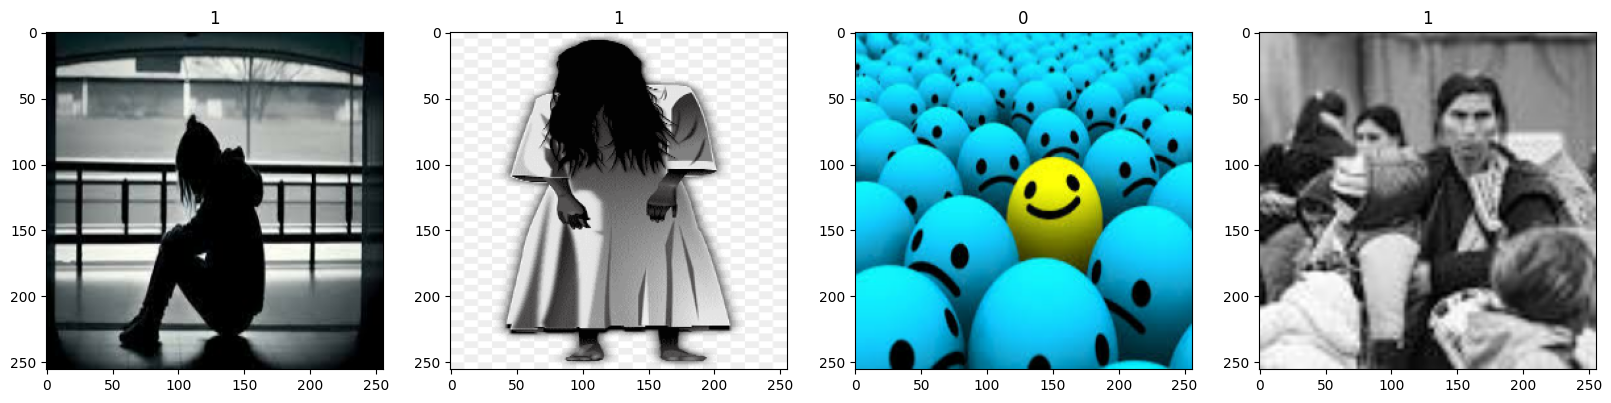

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255,y)) 

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
len(data)

4

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
test_size

1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train)

2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation ='relu'))

model.add(Dense(256, activation ='relu'))

model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir ='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train , epochs=20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 20s 9s/step - loss: 1.3533 - accuracy: 0.6562 - val_loss: 0.6668 - val_accuracy: 0.6562
Epoch 2/20
2/2 [==============================] - 14s 8s/step - loss: 0.6853 - accuracy: 0.5625 - val_loss: 0.6731 - val_accuracy: 0.6250
Epoch 3/20
2/2 [==============================] - 15s 8s/step - loss: 0.6820 - accuracy: 0.6250 - val_loss: 0.5855 - val_accuracy: 0.6250
Epoch 4/20
2/2 [==============================] - 14s 8s/step - loss: 0.6192 - accuracy: 0.6562 - val_loss: 0.6371 - val_accuracy: 0.8438
Epoch 5/20
2/2 [==============================] - 14s 8s/step - loss: 0.6263 - accuracy: 0.7969 - val_loss: 0.5676 - val_accuracy: 0.6562
Epoch 6/20
2/2 [==============================] - 14s 8s/step - loss: 0.5619 - accuracy: 0.6406 - val_loss: 0.6695 - val_accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 15s 9s/step - loss: 0.5475 - accuracy: 0.6406 - val_loss: 0.5009 - val_accuracy: 0.8125
Epoch 8/20
2/2 [==================

In [ ]:
hist.history

{'loss': [1.3532824516296387,
  0.6853058934211731,
  0.6819660663604736,
  0.6192302107810974,
  0.6262916326522827,
  0.5618606805801392,
  0.5475170612335205,
  0.48323750495910645,
  0.4438623785972595,
  0.42481404542922974,
  0.4092870354652405,
  0.3642834424972534,
  0.31834161281585693,
  0.22038081288337708,
  0.17281889915466309,
  0.2207328975200653,
  0.10501150786876678,
  0.1665250062942505,
  0.11807503551244736,
  0.055457230657339096],
 'accuracy': [0.65625,
  0.5625,
  0.625,
  0.65625,
  0.796875,
  0.640625,
  0.640625,
  0.84375,
  0.765625,
  0.75,
  0.90625,
  0.9375,
  0.859375,
  0.953125,
  0.96875,
  0.921875,
  1.0,
  0.9375,
  0.96875,
  1.0],
 'val_loss': [0.6668109893798828,
  0.6731265187263489,
  0.5855486392974854,
  0.6370507478713989,
  0.5675682425498962,
  0.6695289611816406,
  0.5008774399757385,
  0.5100371241569519,
  0.5837947130203247,
  0.45363256335258484,
  0.2752631902694702,
  0.31743350625038147,
  0.18736499547958374,
  0.1562268286943

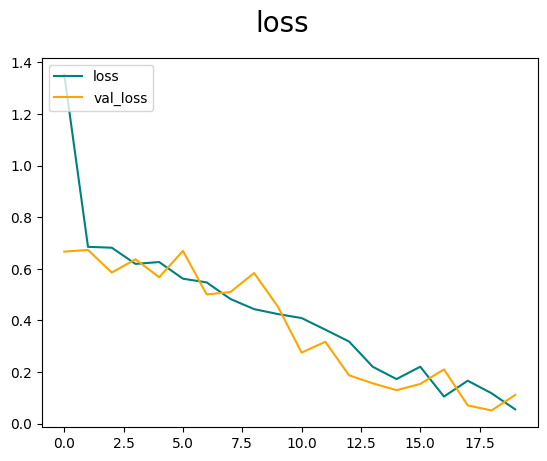

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='teal', label='loss')
plt.plot(hist.history['val_loss'], color ='orange', label ='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

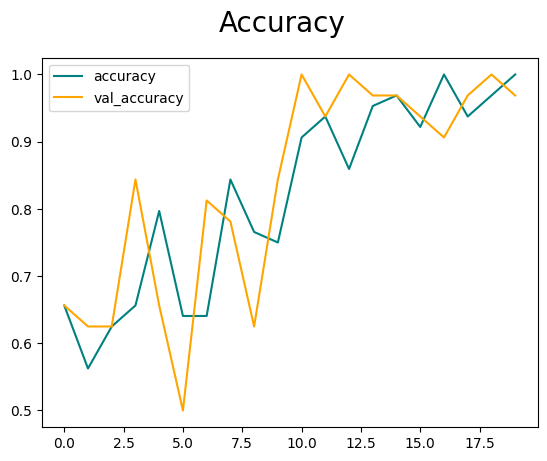

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color ='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    x, y = batch 
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 2s 2s/step


In [ ]:
# print(pre.result(), re.result(), acc.result())
print (f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [ ]:
import cv2

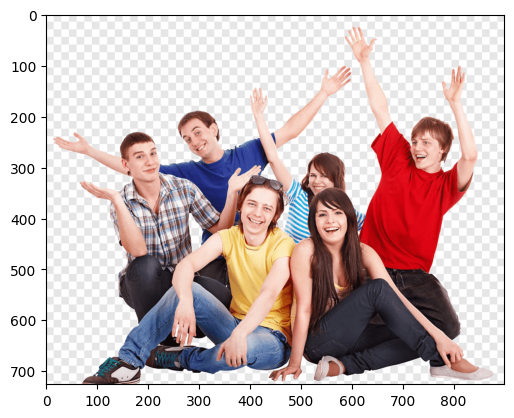

In [ ]:
img = cv2.imread('HappyTest.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

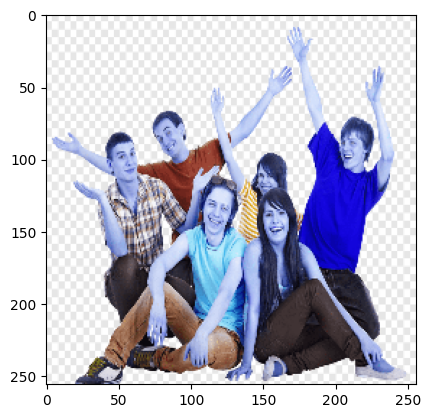

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 1s/step


In [ ]:
yhat

array([[0.01235384]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print (f'Predicted class is Sad')
else :
    print(f'Predicted class is Happy')

Predicted class is Happy


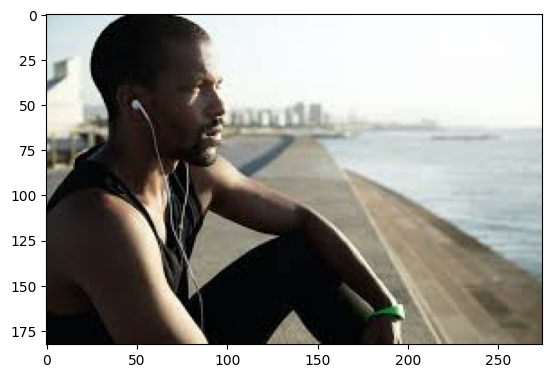

In [ ]:
img = cv2.imread('sadsad.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

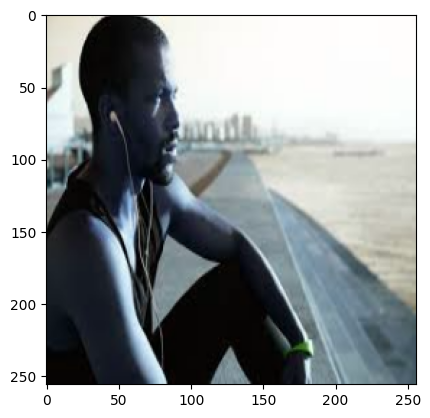

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 269ms/step


In [ ]:
yhat

array([[0.8983337]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print (f'Predicted class is Sad')
else :
    print(f'Predicted class is Happy')

Predicted class is Sad


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','happysadmodel.h5'))

In [ ]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [ ]:
new_model

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 1s 1s/step


In [ ]:
if yhatnew > 0.5:
    print (f'Predicted class is Sad')
else :
    print(f'Predicted class is Happy')

Predicted class is Sad
